### Predicting Student Exam Scores with Machine Learning 
**About the Dataset**

This is a simulated dataset exploring how lifestyle habits affect academic performance in students. With 1,000 synthetic student records and 15+ features including study hours, sleep patterns, social media usage, diet quality, mental health, and final exam scores, it’s perfect for ML projects, regression analysis, clustering, and data viz. Created using realistic patterns for educational practice.


In [1]:
# === Standard Libraries ===
import warnings
import joblib

# === Data Manipulation and Visualization ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Scikit-learn: Preprocessing, Models, Evaluation ===
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Configuration ===
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")  # Set consistent seaborn style

In [2]:
# importing dataset
df =  pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


#### Overview of the dataset

In [3]:
df.shape

(1000, 16)

In [4]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

#### Explatory Data Analysis

In [6]:
# looking for null values
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [7]:
df['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [8]:
df['parental_education_level'].describe()

count             909
unique              3
top       High School
freq              392
Name: parental_education_level, dtype: object

In [9]:
# filling missing values
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [10]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [11]:
# handling duplicated values
df.duplicated().sum()

0

In [12]:
# drop student_id
df.drop('student_id', axis=1, inplace=True)

#### Visualisation of the distributions

In [13]:
# descriptive statistics for numerical data
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [14]:
# descriptive statistics for categorical data
df.describe(include="object")

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,483,447,682


In [15]:
#categorical_cols = df.describe(include="object").columns
categorical_cols = [
    'gender', 'part_time_job', 'diet_quality','parental_education_level', 
    'internet_quality', 'extracurricular_participation']
categorical_cols

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

In [16]:
# viewing value counts for categorical variables
print("Categorical Feature Value Counts:\n" + "="*40)

for col in categorical_cols:
    print(f"\nValue Counts for '{col}':\n" + "-"*40)
    print(df[col].value_counts())  
    print("-"*40)
    print(f"Unique Categories: {df[col].nunique()}")
    print("*" * 50)

Categorical Feature Value Counts:

Value Counts for 'gender':
----------------------------------------
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
----------------------------------------
Unique Categories: 3
**************************************************

Value Counts for 'part_time_job':
----------------------------------------
part_time_job
No     785
Yes    215
Name: count, dtype: int64
----------------------------------------
Unique Categories: 2
**************************************************

Value Counts for 'diet_quality':
----------------------------------------
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
----------------------------------------
Unique Categories: 3
**************************************************

Value Counts for 'parental_education_level':
----------------------------------------
parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64


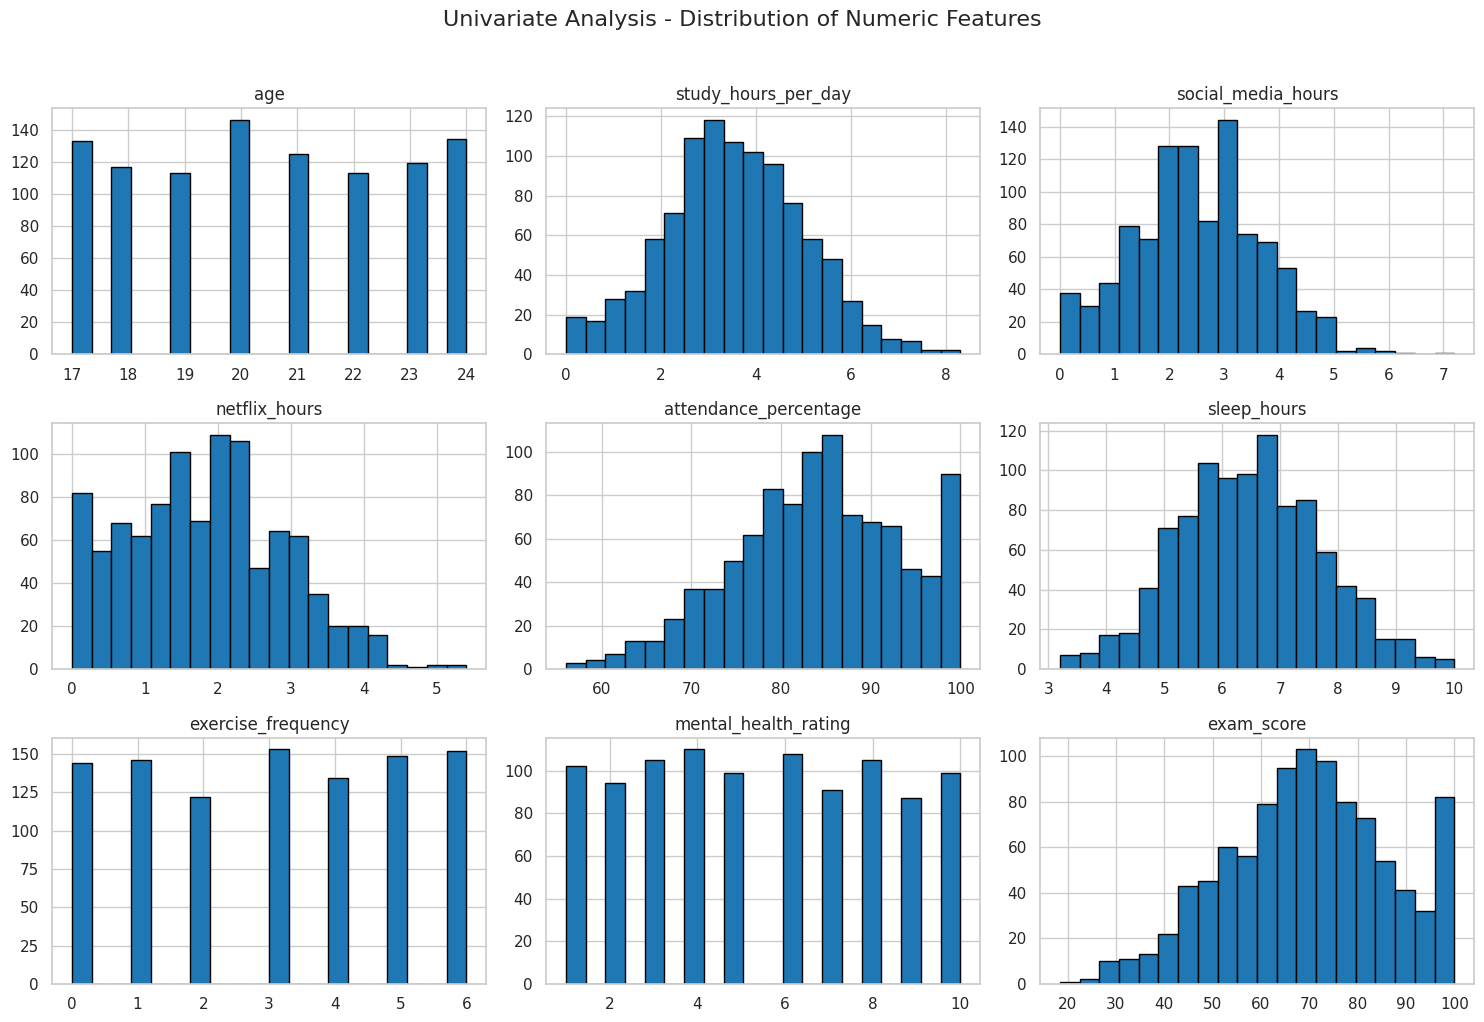

In [52]:
# univariate analysis
# create histogram plots for all numerical columns
df.hist(
    bins=20, 
    edgecolor="black", 
    figsize=(15, 10), 
    color="#1f77b4"  
)

plt.suptitle("Univariate Analysis - Distribution of Numeric Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

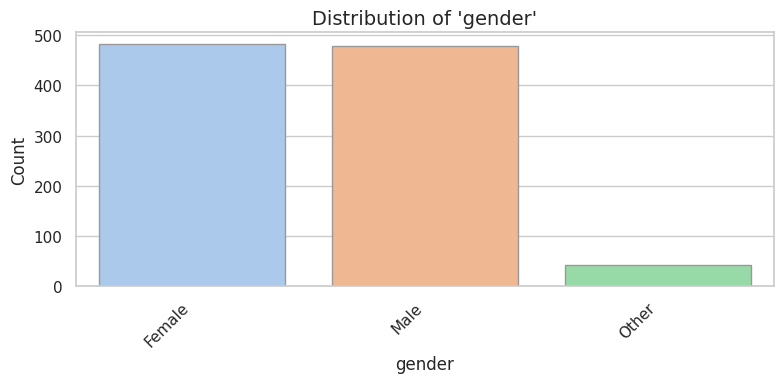

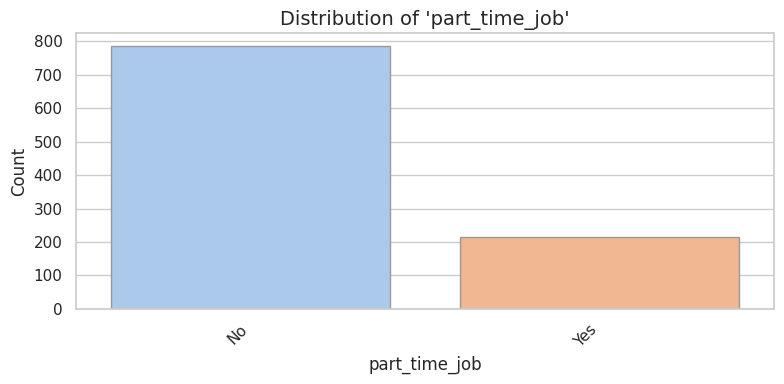

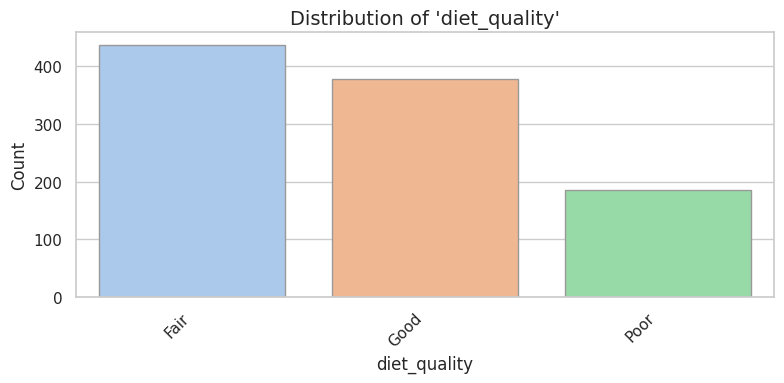

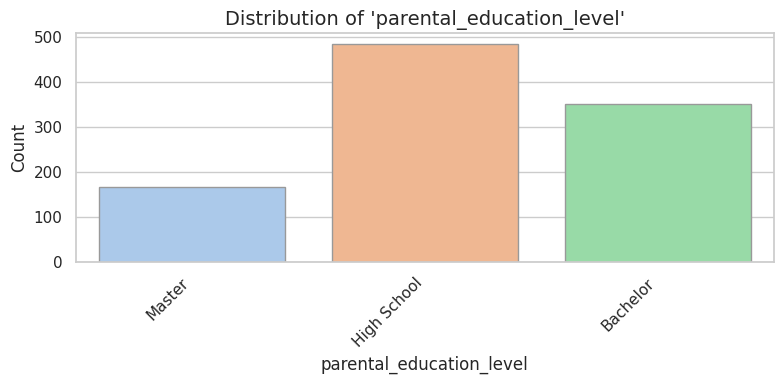

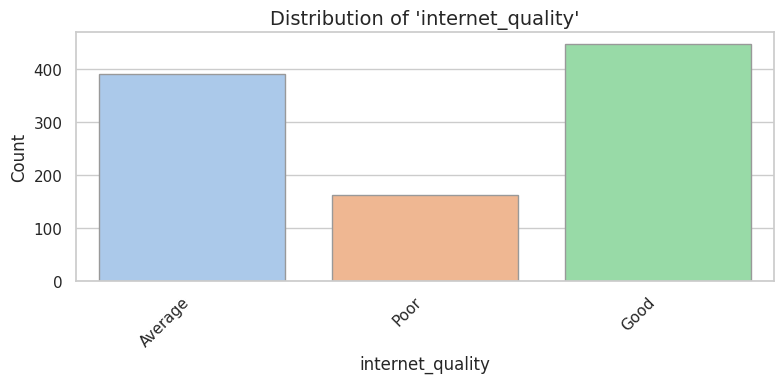

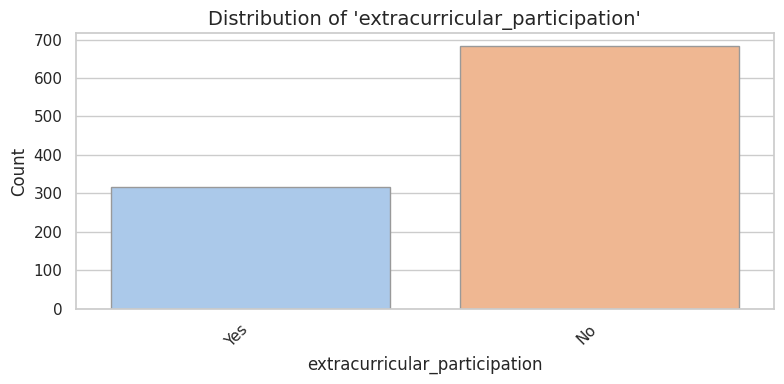

In [18]:
# countplots for all categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="pastel", edgecolor=".6")
    plt.title(f"Distribution of '{col}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [19]:
# correlation matrix
correlation_mat = df.corr(numeric_only=True)
correlation_mat

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


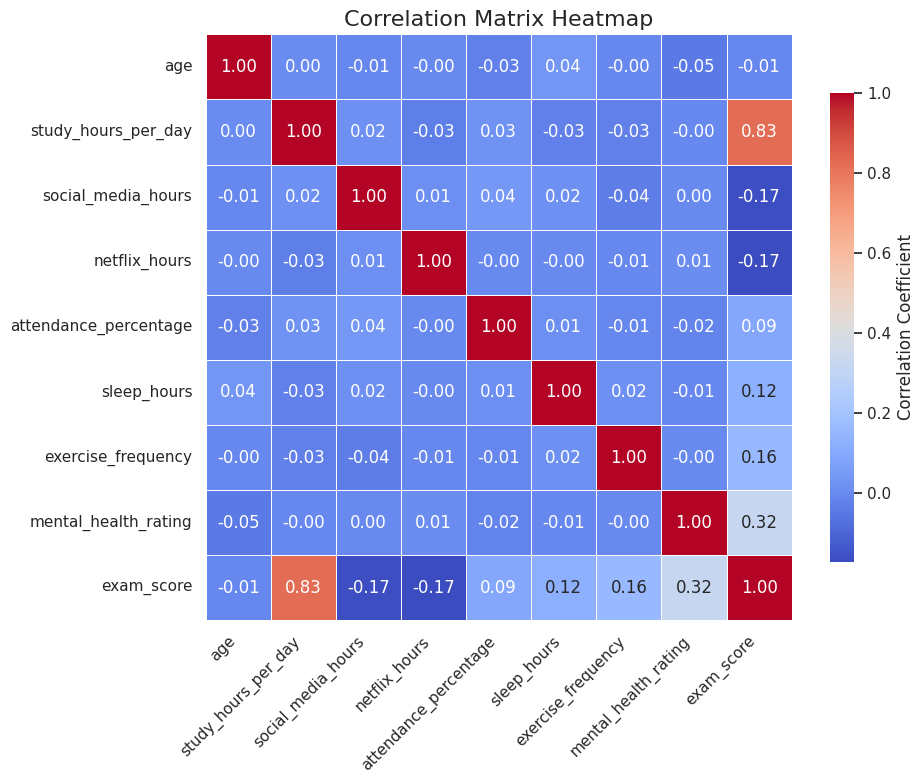

In [20]:
# correlation Matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_mat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
# bivariate analysis for the target
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [22]:
numerical_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

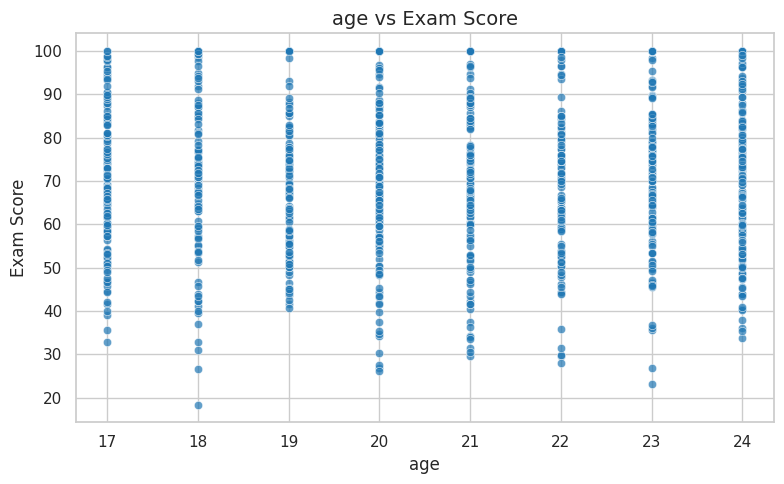

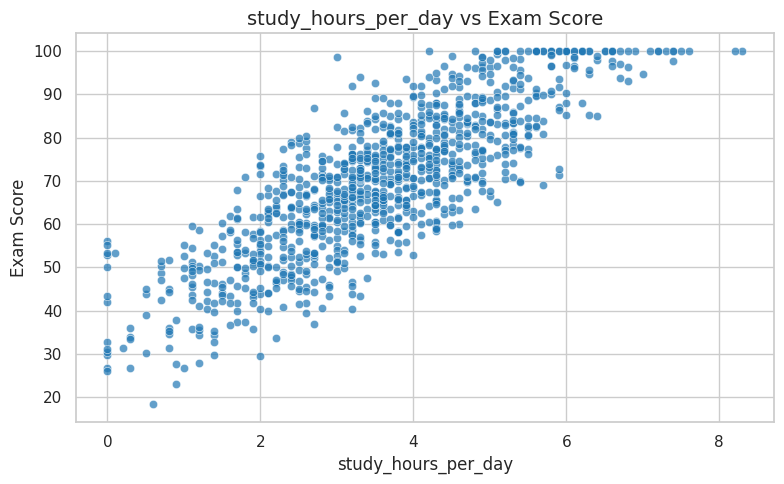

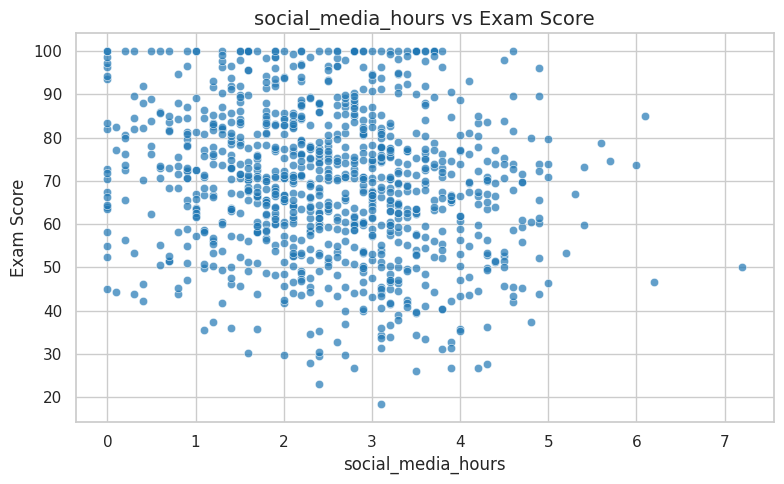

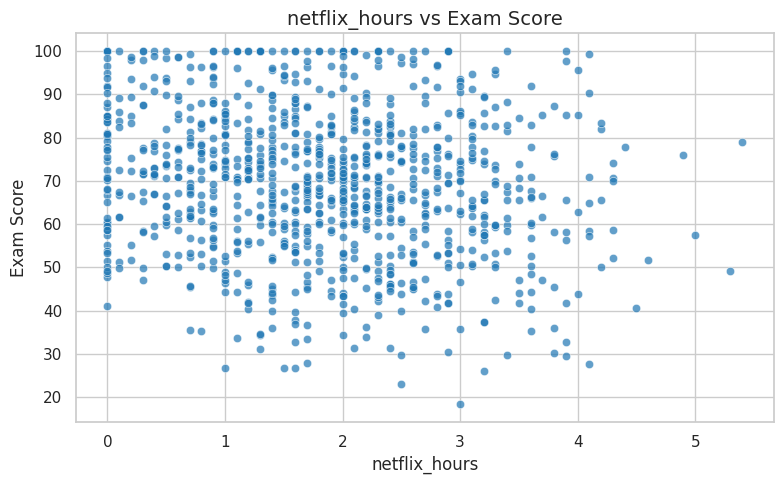

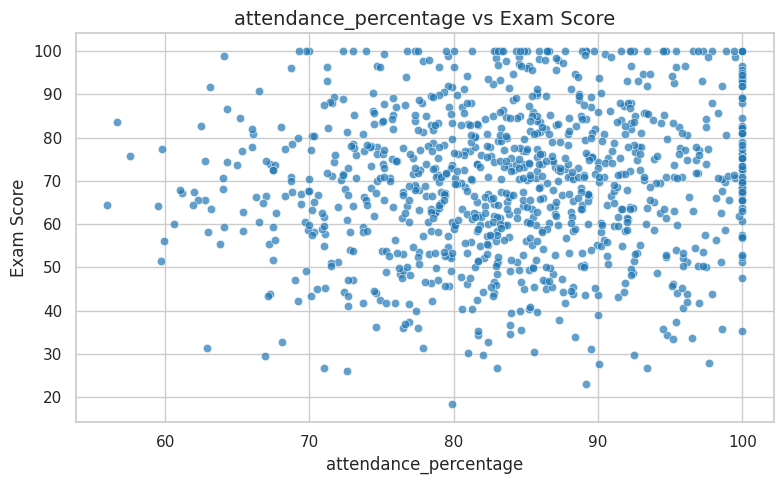

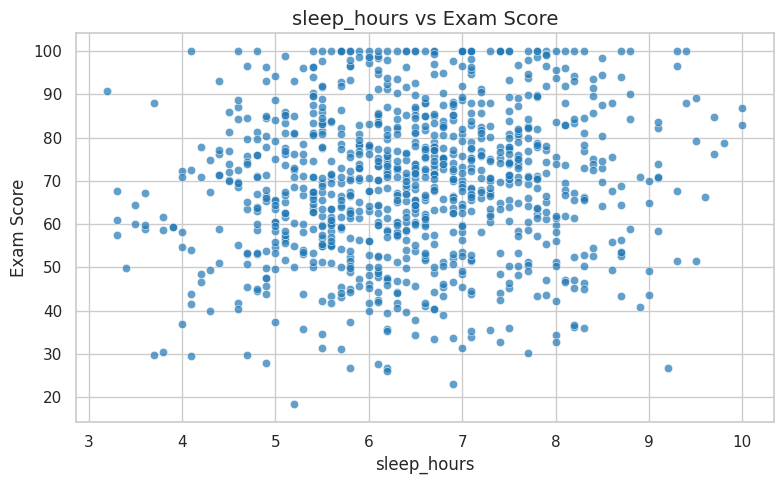

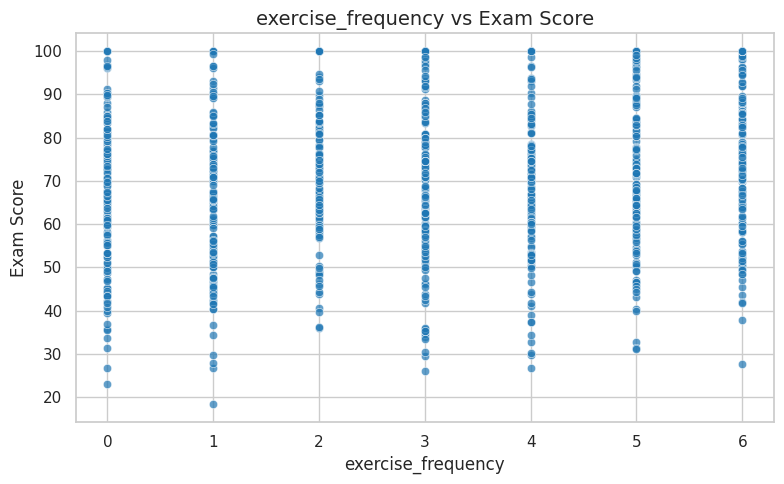

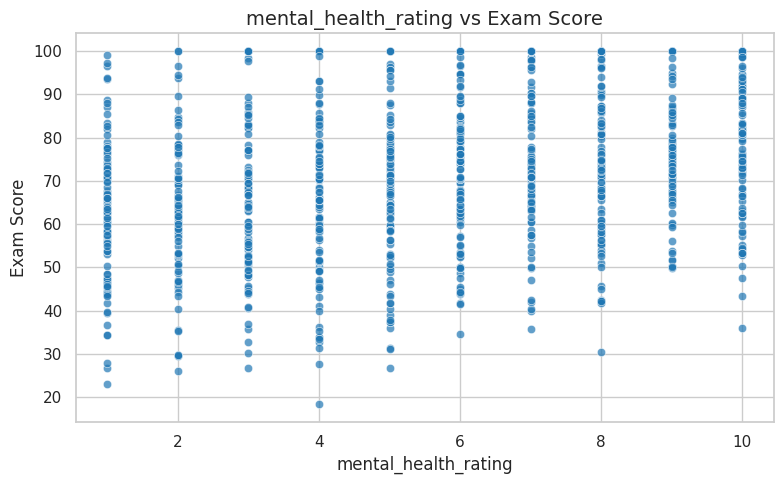

In [23]:
# scatter plots: numerical features vs exam_score
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y='exam_score', color="#1f77b4", edgecolor="w", alpha=0.7)
    plt.title(f"{col} vs Exam Score", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Exam Score", fontsize=12)
    plt.tight_layout()
    plt.show()

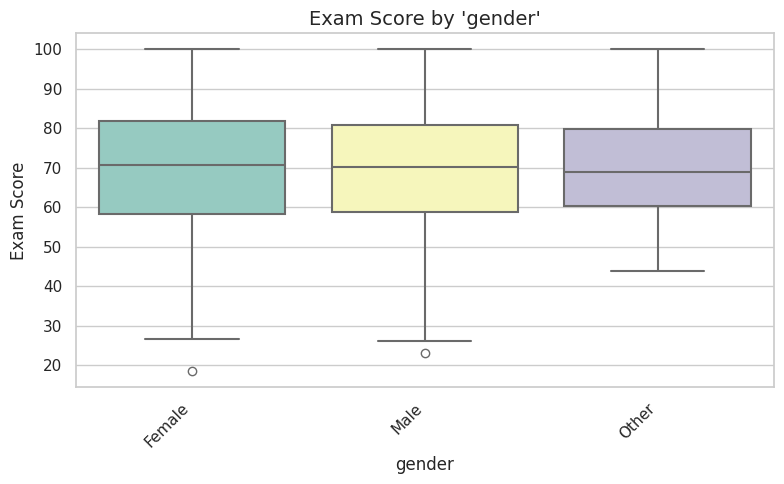

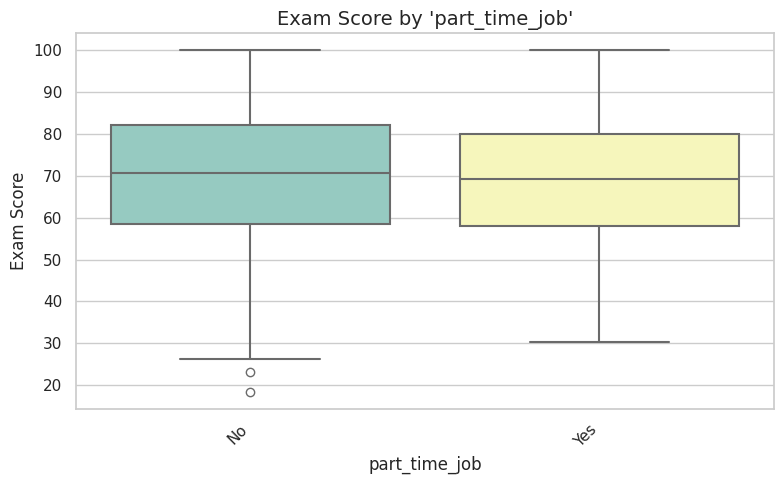

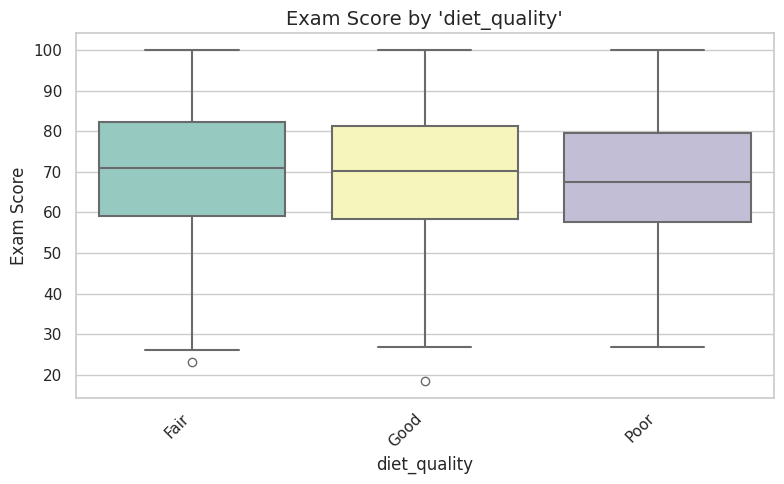

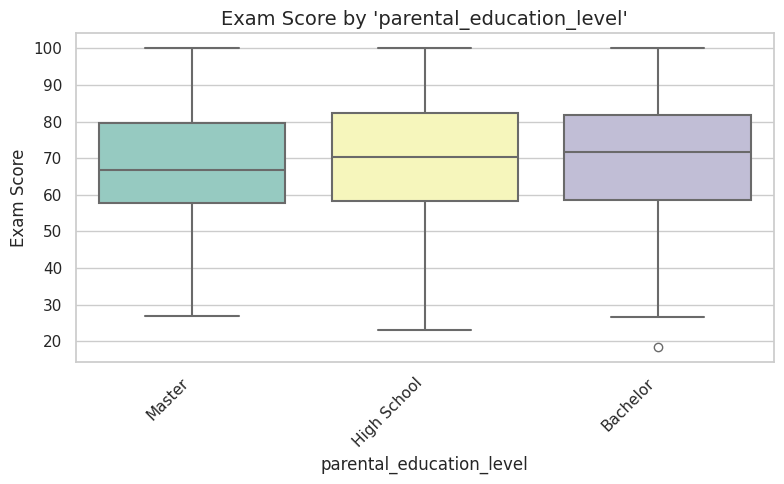

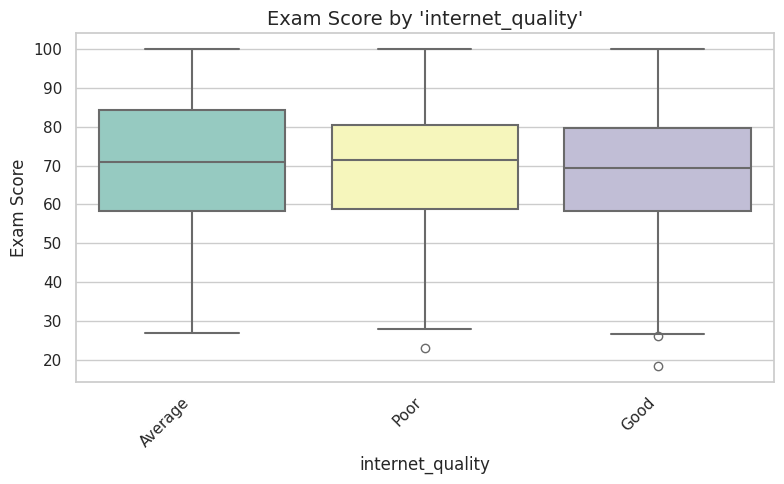

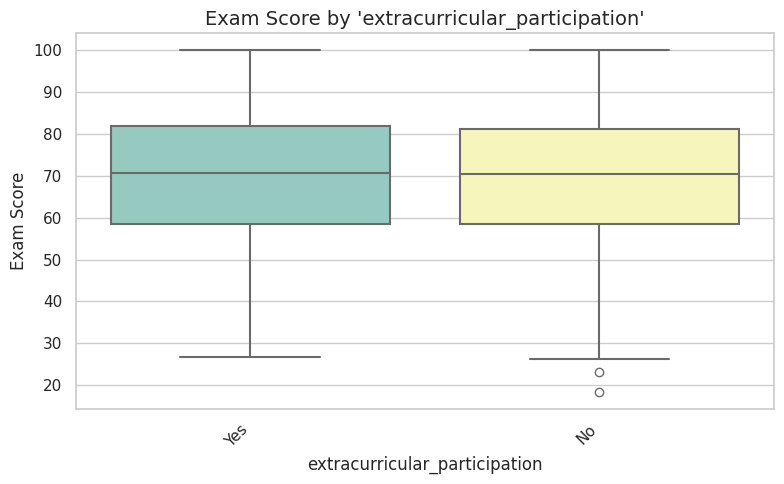

In [24]:
# box plots: exam score by categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=df, 
        x=col, 
        y="exam_score", 
        palette="Set3", 
        linewidth=1.5
    )
    plt.title(f"Exam Score by '{col}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Exam Score", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### Encoding OHE + Label Encoding

In [25]:
df2 =df.copy()

In [26]:
df2[categorical_cols].head()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
0,Female,No,Fair,Master,Average,Yes
1,Female,No,Good,High School,Average,No
2,Male,No,Poor,High School,Poor,No
3,Female,No,Poor,Master,Good,Yes
4,Female,No,Fair,Master,Good,No


In [27]:
df2[categorical_cols].describe()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,483,447,682


In [28]:
for col in categorical_cols:
    print(col)

gender
part_time_job
diet_quality
parental_education_level
internet_quality
extracurricular_participation


1. Label encoding : diet_quality, parental_education, internet_quality
2. One Hot Encoding : gender, part_time_job, extracurricular_participation

In [29]:
# define ordinal mappings for categorical variables based on logical order
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

In [30]:
# apply ordinal encoding to categorical variables using the predefined mappings
df2['diet_quality_e'] = df2['diet_quality'].map(diet_quality)
df2['parental_education_level_e'] = df2['parental_education_level'].map(parental_education_level)
df2['internet_quality_e'] = df2['internet_quality'].map(internet_quality)

In [31]:
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,diet_quality_e,parental_education_level_e,internet_quality_e
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,1,2,1
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,2,0,1
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,0,0,0
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,0,2,2
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,1,2,2


In [32]:
# perform one-hot encoding on selected nominal categorical variables
# 'drop_first=True' avoids multicollinearity by dropping the first category in each column
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']], drop_first=True)
dummies.head()

,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,False,False,False,True
1,False,False,False,False
2,True,False,False,False
3,False,False,False,True
4,False,False,False,False


In [55]:
# save dummy columns for use in prediction
joblib.dump(dummies.columns.tolist(), 'dummy_columns.pkl')

['dummy_columns.pkl']

In [33]:
# concatenate the dummy variables with the original dataframe along the columns
df3 = pd.concat([df2,dummies], axis=1)

In [34]:
# drop the original categorical columns used for dummy encoding
df3 = df3.drop(['gender',
          'part_time_job',
          'diet_quality',
          'parental_education_level',
          'internet_quality',
          'extracurricular_participation'], axis=1)

In [53]:
df3.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score', 'diet_quality_e',
       'parental_education_level_e', 'internet_quality_e', 'gender_Male',
       'gender_Other', 'part_time_job_Yes',
       'extracurricular_participation_Yes'],
      dtype='object')

In [35]:
df3.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,diet_quality_e,parental_education_level_e,internet_quality_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,2,1,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0,1,False,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,True,False,False,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,2,False,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,2,False,False,False,False


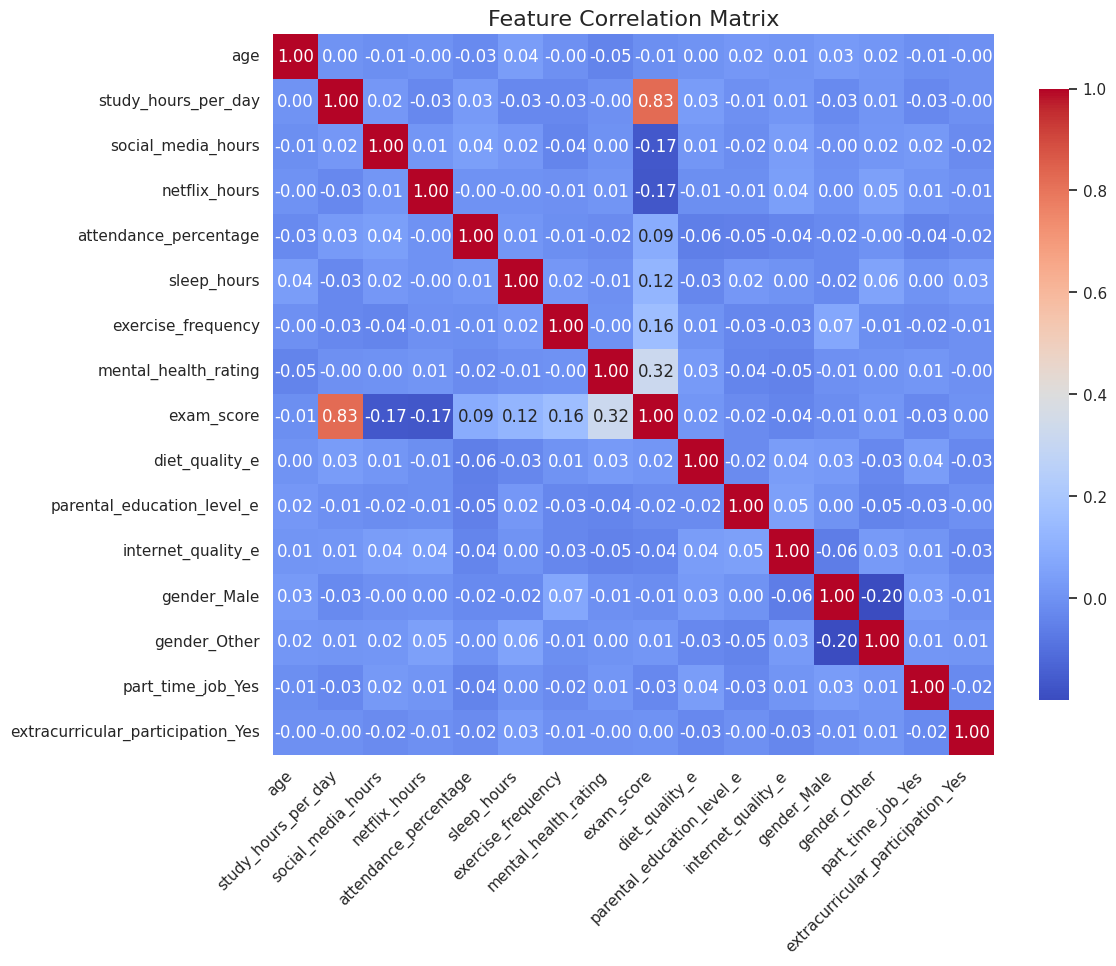

In [36]:
# compute and visualize the correlation matrix of all numerical features
corr = df3.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
# separate features (X) and target variable (y)
X = df3.drop('exam_score', axis=1)
y = df3['exam_score']
X.shape, y.shape

((1000, 15), (1000,))

In [38]:
# standardize the feature variables to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# check the shape of the scaled feature matrix
X_scaled.shape 

(1000, 15)

In [54]:
# save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

#### Train Test Split

In [39]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 15), (200, 15), (800,), (200,))

In [40]:
# initialize and train a Linear Regression model on the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# evaluate model performance on the test set using R² score
lr_score = lr_model.score(X_test, y_test)
lr_score

0.8988342264221522

#### Model training and score comparison

In [41]:
# define models and their hyperparameter grids
model_params = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {"alpha": [0.01, 0.1, 1.0, 10.0]}
    },
    "Lasso Regression": {
        "model": Lasso(),
        "params": {"alpha": [0.001, 0.01, 0.1, 1.0]}
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {"max_depth": [3, 5, 7, None], "min_samples_split": [2, 5, 10]}
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, 7],
            "min_samples_split": [2, 5]
        }
    }
}

# store results in a list of dictionaries
results = []

for name, mp in model_params.items():
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        "Model": name,
        "Best Parameters": grid.best_params_,
        "R² Score": round(r2, 4),
        "RMSE": round(rmse, 2)
    })


In [42]:
# convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R² Score", ascending=False).reset_index(drop=True)
print(results_df.to_string(index=False))

            Model                                               Best Parameters  R² Score  RMSE
Linear Regression                                                            {}    0.8988  5.09
 Ridge Regression                                                {'alpha': 1.0}    0.8988  5.09
 Lasso Regression                                                {'alpha': 0.1}    0.8985  5.10
    Random Forest {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}    0.8388  6.43
    Decision Tree                     {'max_depth': 5, 'min_samples_split': 10}    0.6922  8.88


In [43]:
# getting best model with parameters
best_model = results_df .iloc[0]
best_model

Model              Linear Regression
Best Parameters                   {}
R² Score                      0.8988
RMSE                            5.09
Name: 0, dtype: object

In [44]:
# getting best model name
best_model_name = best_model['Model']
best_model_name

'Linear Regression'

In [45]:
# getting best model configs
best_model_config = model_params[best_model_name]
best_model_config

{'model': LinearRegression(), 'params': {}}

In [46]:
# final model
final_model = best_model_config["model"].set_params(**best_model['Best Parameters'])
final_model.fit(X,y)

LinearRegression()

In [47]:
# make prediction
final_model.predict(X_test)

array([ 7.21715769e+00,  1.19665054e+01,  1.46285461e+01,  6.90456717e+00,
        4.70031584e-01, -3.59913399e-01,  8.45194905e+00, -2.05529243e+00,
       -9.48232301e+00,  8.21640569e+00, -1.17497999e+01,  2.61694363e+01,
        2.67539291e+00,  5.69806598e+00, -1.38758104e+01,  3.31477865e+00,
        7.50581036e+00,  6.59431133e+00,  7.63893148e+00, -7.02308886e+00,
       -2.69682238e+00,  4.13520171e+00, -8.35877573e+00,  1.69186357e+01,
        6.41641467e+00,  1.30472308e+01,  5.12960886e+00, -2.90512416e+00,
        9.90631978e+00,  5.90266709e+00,  4.99580553e+00,  1.26052096e+01,
        5.74731971e+00,  1.29653918e+01,  6.76313548e-01, -5.53590373e+00,
        6.67582403e+00,  1.88412481e+00,  2.81913712e+00,  2.60976365e+01,
       -6.93457797e+00,  1.92743007e+01,  5.13141378e+00,  1.37848378e+00,
        1.99436861e+01,  1.67512531e+01,  3.36727922e-01,  1.80296414e+01,
        3.51444345e+00,  3.16923911e+00,  3.75735334e+00, -8.30949706e+00,
        1.05013883e+01,  

In [48]:
# export final best model
joblib.dump(final_model, "final_best_model.pkl")

['final_best_model.pkl']

In [49]:
X.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'diet_quality_e', 'parental_education_level_e',
       'internet_quality_e', 'gender_Male', 'gender_Other',
       'part_time_job_Yes', 'extracurricular_participation_Yes'],
      dtype='object')

In [ ]:
# load the exported model and make predictions on the test set
loaded_model = joblib.load("final_best_model.pkl")

# custom_input features
custom_input = np.array([[28, 2.5, 3.0, 1.0, 85.0, 7.0, 2, 6, 0, 0, 1, 1, 0, 0, 1]])
predictions = loaded_model.predict(custom_input)
predictions[0]

61.1528880106411